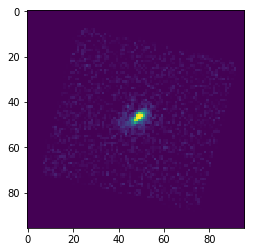

In [25]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu May 16 10:41:56 2019

@author: fnammour
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label
from astropy.io import fits as fits

target=fits.getdata('/data/DeepDeconv/data/vsc_euclidpsfs/reshuffle/image-shfl-2-multihdu.fits',2)
plt.imshow(target[93*96:94*96,61*96:62*96],vmin=0,vmax=0.5)

In [22]:
img_res = target*(target>0)
thr=np.quantile(img_res[93*96:94*96,61*96:62*96],0.93)
tar=np.zeros_like(img_res)
tar[img_res>thr]=1


In [26]:
res=np.zeros_like(target)
mask_array=np.zeros_like(target)
for i in range(100):
    for j in range(100):
        mask=(tar[i*96:(i+1)*96,j*96:(j+1)*96]*remove_blobs(tar[i*96:(i+1)*96,j*96:(j+1)*96],target[i*96:(i+1)*96,j*96:(j+1)*96]))
        img=target[i*96:(i+1)*96,j*96:(j+1)*96]*mask
        res[i*96:(i+1)*96,j*96:(j+1)*96]=img
        mask_array[i*96:(i+1)*96,j*96:(j+1)*96]=mask

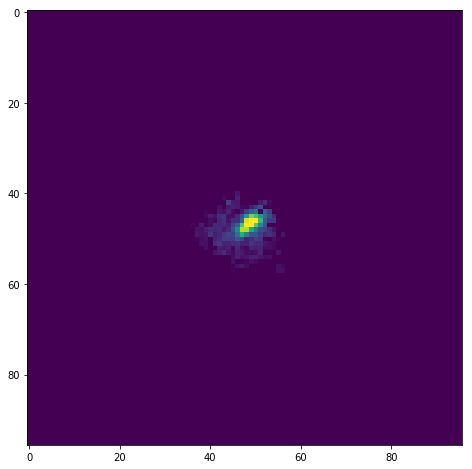

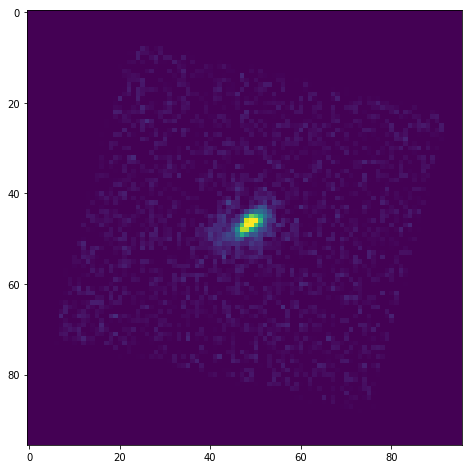

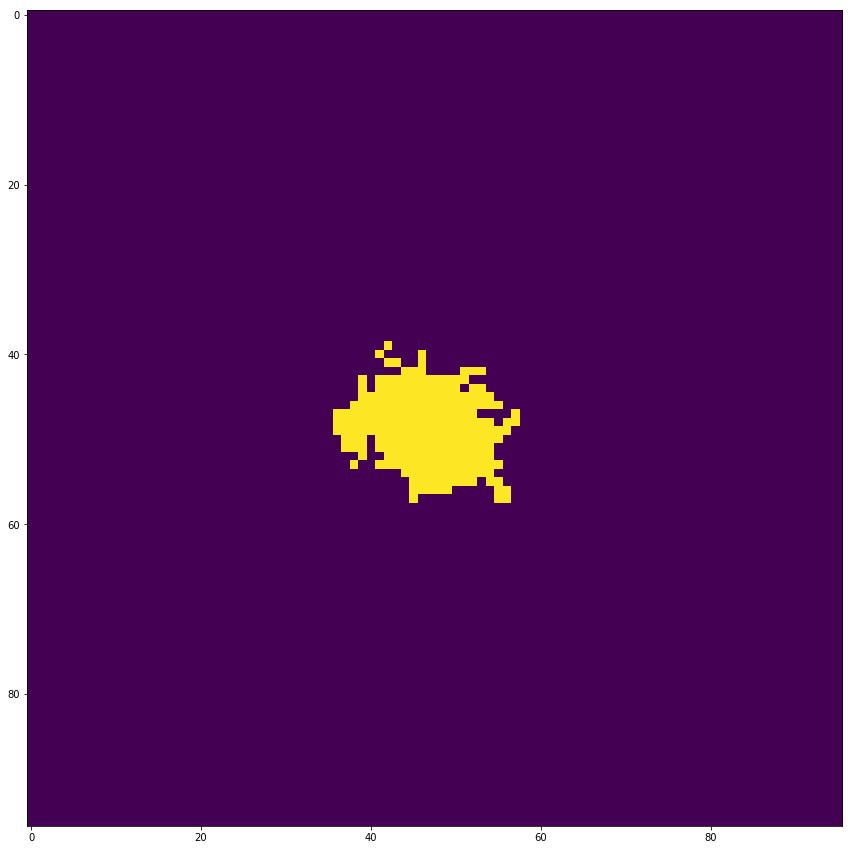

In [27]:
plt.figure(figsize=(8,8))
plt.imshow(res[93*96:94*96,61*96:62*96],vmin=0,vmax=0.5);
plt.figure(figsize=(8,8))
plt.imshow(target[93*96:94*96,61*96:62*96],vmin=0,vmax=0.5)
plt.figure(figsize=(15,15))
plt.imshow(mask_array[93*96:94*96,61*96:62*96])


In [ ]:
remove_blobs()

In [11]:
def make_circle(radius=10,center=None,shape=np.array([96,96])):
    if type(center) == type(None):
        center = shape//2
    dist = np.add.outer((np.arange(shape[0])-center[0])**2,(np.arange(shape[1])-center[1])**2)
    return dist<=radius**2

def remove_blobs(imgbin,img,background=0,connectivity=2):
    '''Keep the biggest blob by removing the others.'''
    labels = label(imgbin,background=background,connectivity=connectivity)
    #step 1 find the biggest blob
    indices = np.unique(labels)
    sizes = np.zeros(indices.shape)
    for i in indices[1:]:
        sizes[i] = img[labels==i].sum()
    main_blob_label = np.argmax(sizes)
    main_blob_estimate = (labels==main_blob_label)*main_blob_label
    #step 2 extract mask
    mask = (labels-main_blob_estimate)==0
    return mask



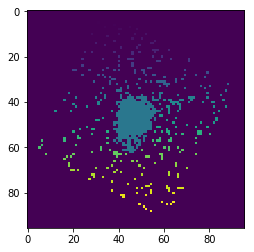

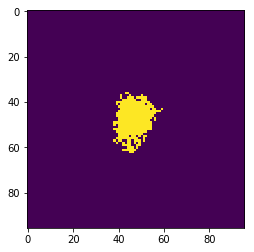

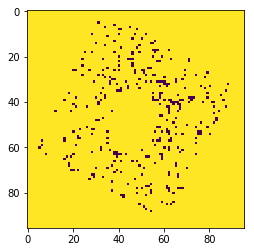

In [6]:

labels = label(tar[0:96,0:96],background=0,connectivity=2)
plt.imshow(labels)
indices = np.unique(labels)
sizes = np.zeros(indices.shape)
for i in indices[1:]:
    sizes[i] = (labels==i).sum()
main_blob_label = np.argmax(sizes)
main_blob_estimate = (labels==main_blob_label)*main_blob_label

main_blob_label
plt.figure()
plt.imshow(main_blob_estimate)

mask = (labels-main_blob_estimate)==0
plt.figure()
plt.imshow(mask)